### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,roc_auc_score

## 2. Importing the data

In [3]:
dataset = pd.read_csv('CE802_P2_Data.csv')
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-0.123210,2577.32,2183.52,7747.32,2.16,9693.21,-2.2498,-1381.98,3033.55,53.796,...,6.7860,1,-3.9290,-0.8095,3.5800,-5.9384,-9.3420,1,NaN,True
1,-2.064600,1200.12,1654.74,6027.72,2.16,9391.26,-2.7420,-1336.20,2081.35,33.514,...,5.5240,0,-1.6609,-2.3020,3.8880,-6.5640,-6.3806,1,NaN,False
2,-0.083748,2769.35,2661.42,7798.66,2.16,9296.28,-3.2130,-1531.16,3397.15,39.430,...,10.0870,0,-2.5100,-2.8190,2.1606,-5.2340,-9.6780,0,NaN,False
3,-2.808300,3161.52,2199.12,8369.32,5.16,7990.71,-2.2703,-1397.03,3289.99,42.012,...,15.5400,1,-2.2555,-0.9770,8.2160,-5.8166,-6.1512,0,42.06,True
4,-0.445800,2707.42,2083.62,9054.72,5.16,8691.81,-3.7310,-804.04,1903.35,43.172,...,4.5188,0,-1.7843,-1.3690,0.7562,-6.4060,-9.5320,0,NaN,True


## 3. Data analysis

In [4]:
# to check the number of rows & columns
dataset.shape

(1000, 22)

In [5]:
# To check class column is balanced or not
dataset["Class"].value_counts()

True     506
False    494
Name: Class, dtype: int64

In [6]:
# it shows the summary statistics of the data frame
dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-1.512791,2520.923949,2120.448916,8459.648266,3.747000,8571.085469,-2.344597,-1249.307215,3205.505415,36.836583,...,2.375746,14.382299,0.481000,-2.315266,-1.338608,2.321917,-6.220027,-7.528717,0.507000,35.050560
std,2.015813,747.470842,1587.054314,2074.355688,1.498224,2108.672583,0.614178,493.077434,511.582397,9.723283,...,1.805525,10.285697,0.499889,0.899919,0.901204,1.805553,1.706913,1.739357,0.500201,3.188244
min,-17.514000,-2459.880000,-7321.080000,-655.080000,2.160000,-5873.790000,-5.111000,-4531.040000,-718.650000,5.420000,...,0.464400,4.232328,0.000000,-5.742000,-4.955000,0.344240,-13.326000,-14.710000,0.000000,24.930000
25%,-1.978575,2440.070000,1505.370000,7659.360000,2.160000,8291.085000,-2.724500,-1423.122500,3071.450000,30.700500,...,1.032950,7.422000,0.000000,-2.798250,-1.707000,0.934900,-6.950000,-8.299000,0.000000,32.850000
50%,-0.760800,2709.570000,1762.455000,8046.520000,5.160000,8986.140000,-2.210750,-1356.980000,3216.461500,36.759900,...,1.807400,11.312000,0.000000,-2.024800,-1.057250,1.764500,-5.677500,-7.018100,1.000000,34.905000
75%,-0.191055,2836.273250,2227.920000,8686.670000,5.160000,9414.442500,-1.857700,-1222.365000,3341.050000,42.986500,...,3.168500,17.182500,1.000000,-1.613575,-0.661825,3.147000,-4.958000,-6.226650,1.000000,37.275000
max,-0.060003,6563.120000,18814.920000,24004.920000,5.160000,19761.210000,-1.570592,1930.960000,6685.350000,75.180000,...,9.444000,86.010000,1.000000,-1.341380,-0.402990,9.316000,-4.422580,-5.684440,1.000000,45.360000


In [7]:
# it helps to get the information about the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   int64  
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

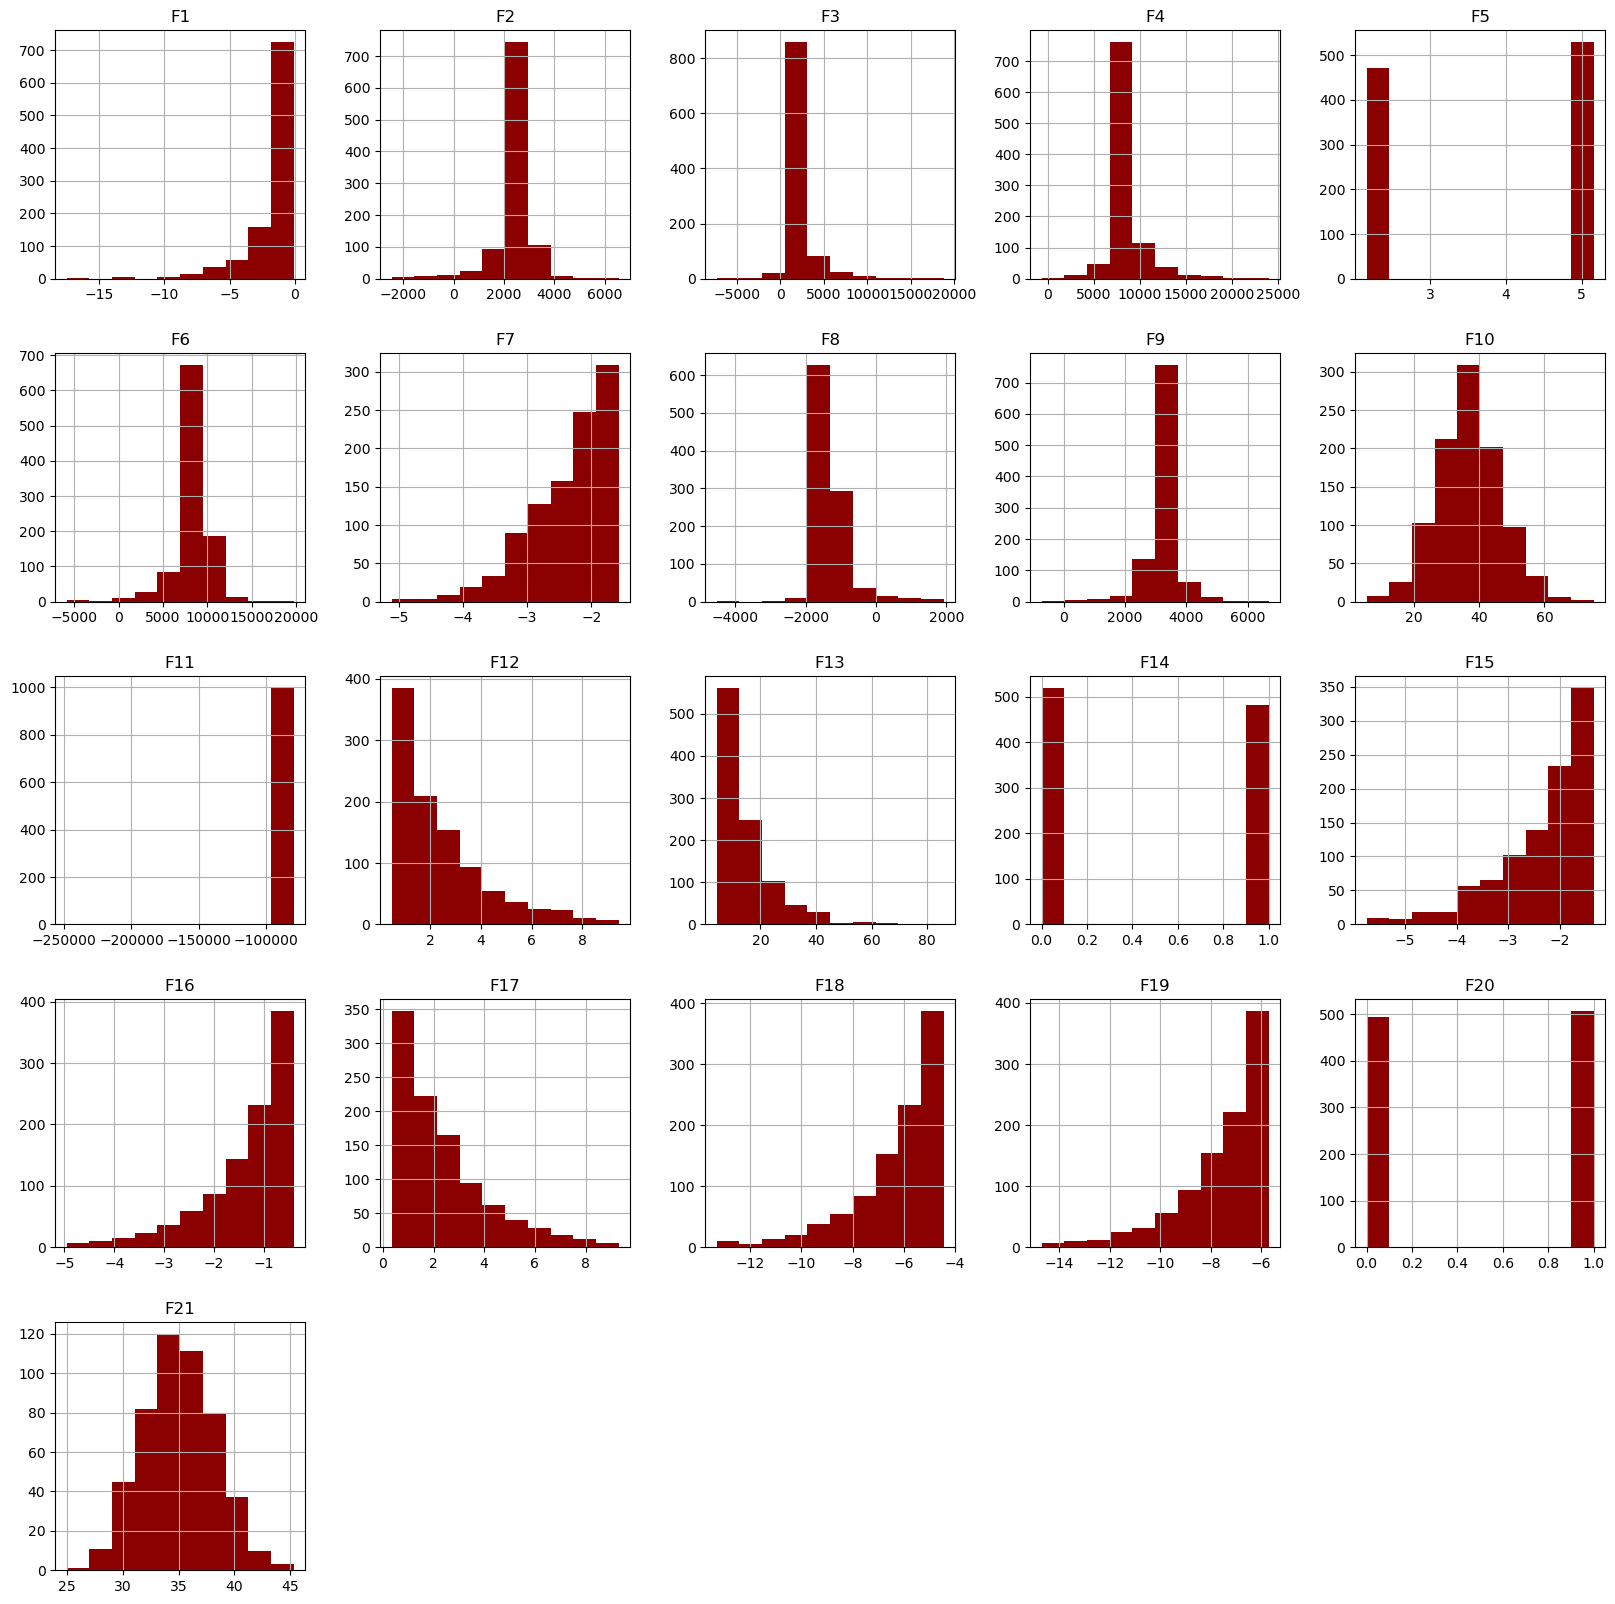

In [8]:
# to see the distribution of dataset
dataset.hist(figsize=(20,20), color = 'DarkRed');

In [9]:
# it will show the missing value
dataset.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [10]:
percent_missing = dataset.F21.isnull().sum() * 100 / len(dataset.F21)
#missing_value_dataset = pd.DataFrame({'dataset.F21': dataset.F21,
#                                 'percent_missing': percent_missing})

In [11]:
print('percentage of missing values in F21 column: ',percent_missing)

percentage of missing values in F21 column:  50.0


<AxesSubplot:>

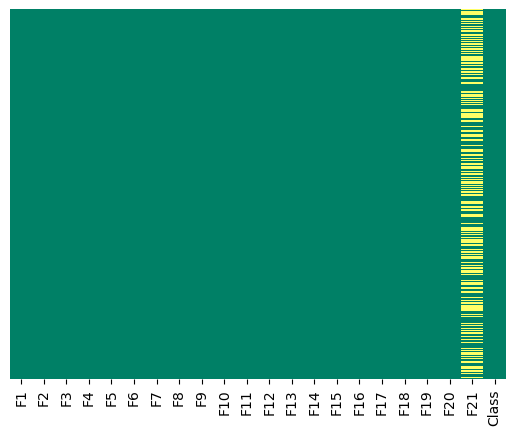

In [12]:
# We can use seaborn to create a simple heatmap to see where we are missing the data!
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap = "summer")

As missing percentage is 50%, which is reasonable enough to be dropped as it will be difficult for model to give the good result after imputing the values

In [13]:
dataset.drop(columns = 'F21', inplace=True)
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,-0.123210,2577.32,2183.52,7747.32,2.16,9693.21,-2.2498,-1381.98,3033.55,53.796,...,2.2986,6.7860,1,-3.9290,-0.8095,3.5800,-5.9384,-9.3420,1,True
1,-2.064600,1200.12,1654.74,6027.72,2.16,9391.26,-2.7420,-1336.20,2081.35,33.514,...,0.9676,5.5240,0,-1.6609,-2.3020,3.8880,-6.5640,-6.3806,1,False
2,-0.083748,2769.35,2661.42,7798.66,2.16,9296.28,-3.2130,-1531.16,3397.15,39.430,...,1.7296,10.0870,0,-2.5100,-2.8190,2.1606,-5.2340,-9.6780,0,False
3,-2.808300,3161.52,2199.12,8369.32,5.16,7990.71,-2.2703,-1397.03,3289.99,42.012,...,3.5320,15.5400,1,-2.2555,-0.9770,8.2160,-5.8166,-6.1512,0,True
4,-0.445800,2707.42,2083.62,9054.72,5.16,8691.81,-3.7310,-804.04,1903.35,43.172,...,0.5662,4.5188,0,-1.7843,-1.3690,0.7562,-6.4060,-9.5320,0,True


In [14]:
X = dataset.drop(columns=['Class'],axis = True)
Y = dataset['Class']

In [15]:
X.shape

(1000, 20)

<AxesSubplot:>

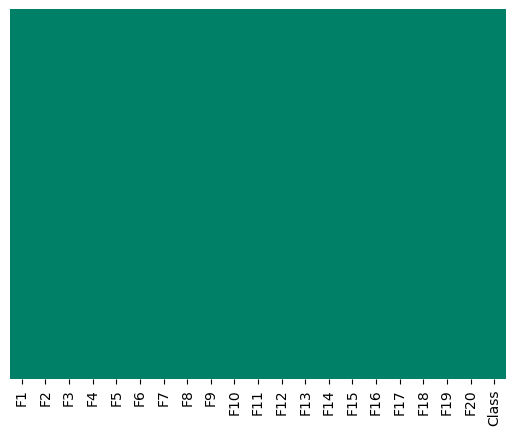

In [16]:
# Here we can see that F21 is dropped from the dataset.
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap = "summer")

## 4. Feature Scaling

In [17]:
#provides an input for the pseudo-random number generator in Python
np.random.seed(42)

In [18]:
# After trying different scaling feature like standard scaler, MinMax Scaler & Robust scaler, I choose robust scaler
rc = RobustScaler()

In [19]:
X_Robust = pd.DataFrame(rc.fit_transform(X),columns=X.columns)
X_Robust.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,0.356690,-0.333793,0.582749,-0.291246,-1.0,0.629426,-0.045051,-0.124528,-0.678455,1.386627,-0.148648,0.230011,-0.463706,1.0,-1.607361,0.237042,0.820713,-0.130974,-1.121384,0.0
1,-0.729390,-3.809787,-0.149076,-1.965132,-1.0,0.360633,-0.612886,0.103508,-4.210354,-0.264195,0.146201,-0.393248,-0.593002,0.0,0.307173,-1.190949,0.959948,-0.445030,0.307622,0.0
2,0.378766,0.150882,1.244156,-0.241271,-1.0,0.276083,-1.156264,-0.867614,0.670210,0.217329,-0.713309,-0.036431,-0.125506,0.0,-0.409564,-1.685603,0.179061,0.222641,-1.283519,-1.0
3,-1.145442,1.140702,0.604339,0.314219,0.0,-0.886120,-0.068701,-0.199494,0.272732,0.427487,-8.185061,0.807567,0.433175,1.0,-0.194737,0.076781,2.916459,-0.069829,0.418317,-1.0
4,0.176222,-0.005427,0.444488,0.981398,0.0,-0.262009,-1.753865,2.754268,-4.870592,0.521903,-0.311683,-0.581209,-0.695989,0.0,0.203009,-0.298275,-0.455811,-0.365713,-1.213067,-1.0


In [20]:
#data is splitted into train-test to apply on the model
X_train,X_test,Y_train,Y_test = train_test_split(X_Robust,Y,test_size=0.2)

## 5. Checked different model

In [21]:
models_rc = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in models_rc:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index=row_index+1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA AUC
0,RandomForestClassifier,1.00,0.855,0.839286,0.895238,0.852882
1,DecisionTreeClassifier,1.00,0.785,0.798077,0.790476,0.784712
2,LogisticRegression,0.68,0.685,0.762500,0.580952,0.690476


## 5. HyperParameter Tunning

first we will apply hyperparameter tunning on Random forest Classisfier

In [22]:
rfc_tunning = RandomForestClassifier()

In [23]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rfc_tunning, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [24]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=2000)

In [25]:
rfc_tunning = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=2000)

rfc_tunning.fit(X_train,Y_train)

y_pred_rfc_tunning = rfc_tunning.predict(X_test)


hyperparameter tunning on Decision Tree Classifier

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
param_dt = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

grid=RandomizedSearchCV(dtc, param_distributions = param_dt, cv=10, n_jobs=-1)

grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]})

In [28]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)

dtc.fit(X_train,Y_train)

dtc_tunning = dtc.predict(X_test)

hyperparameter tunning on Logistic Regression

In [30]:
lr = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grid_lr=RandomizedSearchCV(lr, param_distributions = param_grid, cv=10, n_iter=10,n_jobs=-1)

grid_lr.fit(X_train, Y_train)

C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
10 fits

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [31]:
grid_lr.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='none')

In [33]:
lr_tunning = LogisticRegression(C=4.281332398719396, max_iter=2500, penalty='none',
                   solver='saga')
lr_tunning.fit(X_train,Y_train)

y_pred_tunning = lr_tunning.predict(X_test)


C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
# Analysis of all three models after hyperparameter tunning
model_tunning = [
   
    RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=2000),
    LogisticRegression(C=4.281332398719396, max_iter=2500, penalty='none',
                   solver='saga'),
    DecisionTreeClassifier(criterion='entropy', max_depth=5),
]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in model_tunning:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index=row_index+1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare


C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA AUC
0,DecisionTreeClassifier,0.925,0.925,0.916667,0.942857,0.924060
1,RandomForestClassifier,1.000,0.870,0.849558,0.914286,0.867669
2,LogisticRegression,0.695,0.690,0.752941,0.609524,0.694236


## 6. Confusion matrix of Decision Tree

In [36]:
cm=confusion_matrix(Y_test, dtc_tunning)

<AxesSubplot:>

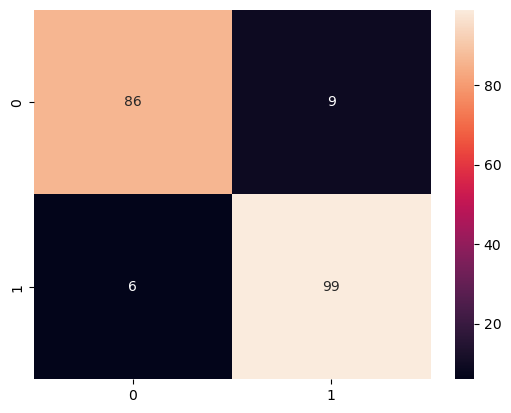

In [37]:
sns.heatmap(cm, annot=True, fmt=".0f")

## Part B

In [38]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

test_data.drop(columns='F21' , inplace=True)
X_Robust = pd.DataFrame(rc.fit_transform(test_data),columns=test_data.columns)
X_Robust.head()
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)

dtc.fit(X_train,Y_train)

dtc_tunning = dtc.predict(X_test)

predicted = dtc.predict(X_Robust) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])